In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
suicide_data = pd.read_csv('suicide.csv')

In [5]:
suicide_data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [6]:
suicide_data.shape

(43776, 6)

In [7]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [14]:
suicide_data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [20]:
suicide_data.dropna(axis=0,inplace = True)

In [22]:
suicide_data.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [23]:
suicide_data.shape

(36060, 6)

In [24]:
suicide_data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

In [25]:
suicide_data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1983, 1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 1979, 1980,
       1981, 1982, 1984, 2011, 2016], dtype=int64)

In [31]:
age_coder = {'5-14 years' : 0,
            '15-24 years' : 1,
            '25-34 years' : 2,
            '35-54 years' : 3,
            '55-74 years' : 4,
            '75+ years' : 5}
gender_coder = {'female' : 0,
               'male' : 1}

In [35]:
suicide_data['age_encoder'] = suicide_data['age'].map(age_coder)
suicide_data['gender_encoder'] = suicide_data['sex'].map(gender_coder)

In [36]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,age_encoder,gender_encoder
24,Albania,1987,female,15-24 years,14.0,289700.0,1,0
25,Albania,1987,female,25-34 years,4.0,257200.0,2,0
26,Albania,1987,female,35-54 years,6.0,278800.0,3,0
27,Albania,1987,female,5-14 years,0.0,311000.0,0,0
28,Albania,1987,female,55-74 years,0.0,144600.0,4,0


In [69]:
# Suicide rates with respect to Age
suicide_data.groupby('age')[['suicides_no']].sum().sort_values(by='suicides_no', ascending=False) #Maximum suicides are in the age group 35-54years

,suicides_no
age,
35-54 years,2887740.0
55-74 years,1955150.0
25-34 years,1360780.0
15-24 years,975700.0
75+ years,756777.0
5-14 years,62320.0


Text(0,0.5,'Number of suicides')

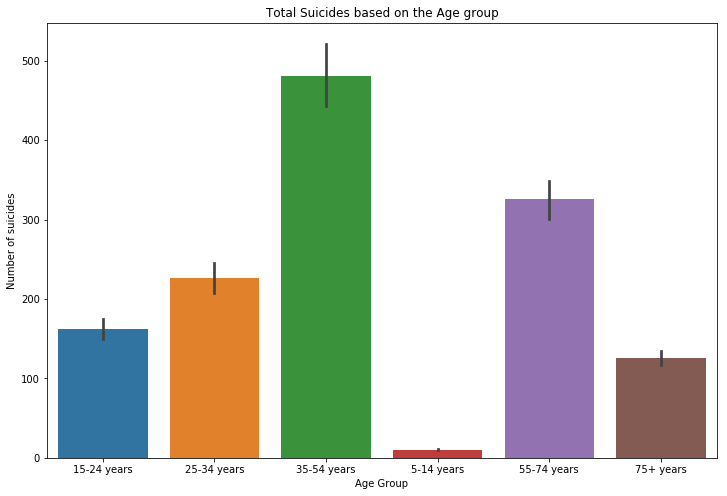

In [54]:
# Visual representation
plt.figure(figsize=(12,8))
sns.barplot(x=suicide_data['age'], y= suicide_data['suicides_no'])
plt.title('Total Suicides based on the Age group')
plt.xlabel('Age Group')
plt.ylabel('Number of suicides')

In [58]:
# Suicide rate with respect to gender
suicide_data.groupby('sex')[['suicides_no']].sum() # Males have more suicide rate than female

,suicides_no
sex,
female,1894294.0
male,6104173.0


Text(0,0.5,'Number of suicides')

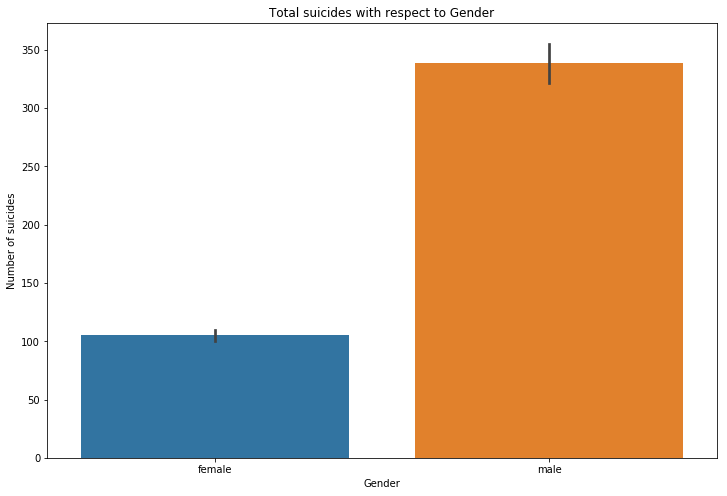

In [60]:
# Visual representation
plt.figure(figsize=(12,8))
sns.barplot(x = suicide_data['sex'], y = suicide_data['suicides_no'])
plt.title('Total suicides with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Number of suicides')

In [68]:
# Suicide rates of top most 10 countries
suicide_data.groupby('country')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False).head(10)

,suicides_no
country,
Russian Federation,1500992.0
United States of America,1201401.0
Japan,937614.0
France,395500.0
Ukraine,365170.0
Germany,291262.0
Republic of Korea,261730.0
Brazil,250824.0
Poland,172562.0


<Figure size 864x576 with 0 Axes>

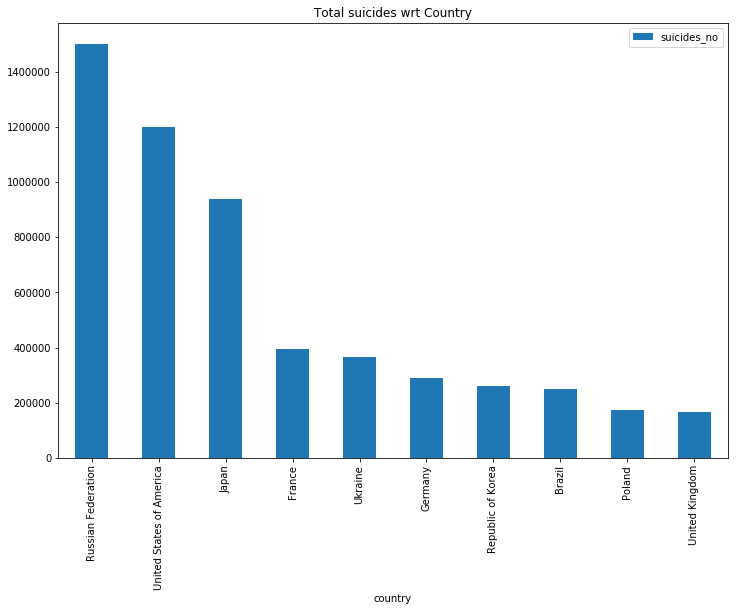

In [80]:
#Visual representation
plt.figure(figsize=(12,8))
suicide_data.groupby('country')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False).head(10).plot(kind='bar',
                                                                                 title = 'Total suicides wrt Country',
                                                                               figsize=(12,8))

In [74]:
# Rate of suicides with respect to year
suicide_data.dtypes

country            object
year                int64
sex                object
age                object
suicides_no       float64
population        float64
age_encoder         int64
gender_encoder      int64
dtype: object

In [78]:
suicide_data.groupby('year')[['suicides_no']].sum().sort_values(by = 'suicides_no',ascending = False)

,suicides_no
year,
2002,259376.0
2003,259336.0
1999,258989.0
2000,258808.0
2001,254036.0
1998,252324.0
1996,249451.0
2009,246323.0
1995,245203.0


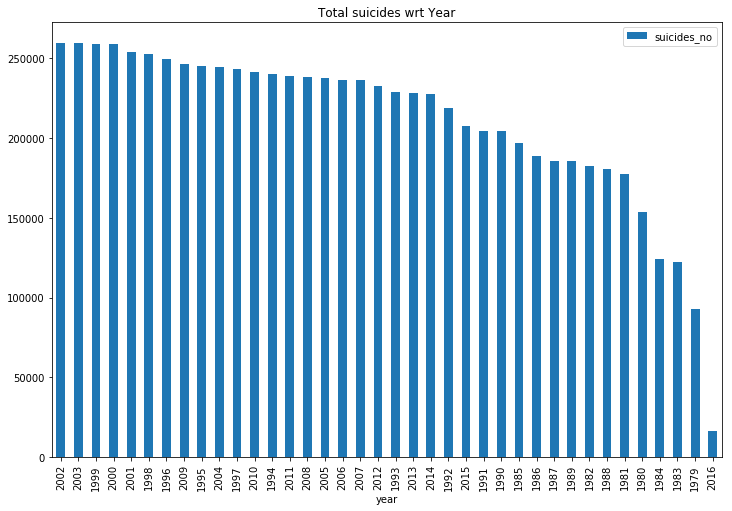

In [82]:
# Visual representation
suicide_data.groupby('year')[['suicides_no']].sum().sort_values(by = 'suicides_no',ascending = False).plot(kind='bar',
                                                                                            title = 'Total suicides wrt Year',
                                                                                                           figsize = (12,8)
                                                                                                          )

In [85]:
# Suicides based on year and age
suicide_data.groupby(['year','age']).sum()['suicides_no']

year  age        
1979  15-24 years    14701.0
      25-34 years    17149.0
      35-54 years    28614.0
      5-14 years       635.0
      55-74 years    23270.0
      75+ years       8421.0
1980  15-24 years    23078.0
      25-34 years    29321.0
      35-54 years    53479.0
      5-14 years       993.0
      55-74 years    34553.0
      75+ years      11976.0
1981  15-24 years    25131.0
      25-34 years    34299.0
      35-54 years    63908.0
      5-14 years      1181.0
      55-74 years    39938.0
      75+ years      13248.0
1982  15-24 years    24964.0
      25-34 years    35430.0
      35-54 years    64853.0
      5-14 years      1141.0
      55-74 years    41815.0
      75+ years      14232.0
1983  15-24 years    18311.0
      25-34 years    22403.0
      35-54 years    38399.0
      5-14 years       984.0
      55-74 years    30242.0
      75+ years      11827.0
                      ...   
2012  15-24 years    26701.0
      25-34 years    37072.0
      35-54 years    8337

In [ ]:
plt.figure(figsize=(20,8))
color = ['red','green','blue','yellow','black','brown']
sns.swarmplot(x = 'year', y = 'suicides_no',hue = 'age', data = suicide_data,palette=color )
plt.title('Suicide rates with respect to Year and Age')

In [96]:
# Suicide rates with respect to Country & Age
suicide_data.groupby(['country','age']).sum()['suicides_no']

country                             age        
Albania                             15-24 years       546.0
                                    25-34 years       427.0
                                    35-54 years       591.0
                                    5-14 years         61.0
                                    55-74 years       264.0
                                    75+ years          81.0
Antigua and Barbuda                 15-24 years         0.0
                                    25-34 years         1.0
                                    35-54 years         6.0
                                    5-14 years          0.0
                                    55-74 years         4.0
                                    75+ years           0.0
Argentina                           15-24 years     19092.0
                                    25-34 years     15099.0
                                    35-54 years     25304.0
                                    5-14 years      

Text(0.5,1,'Suicide Based On The Country and Age')

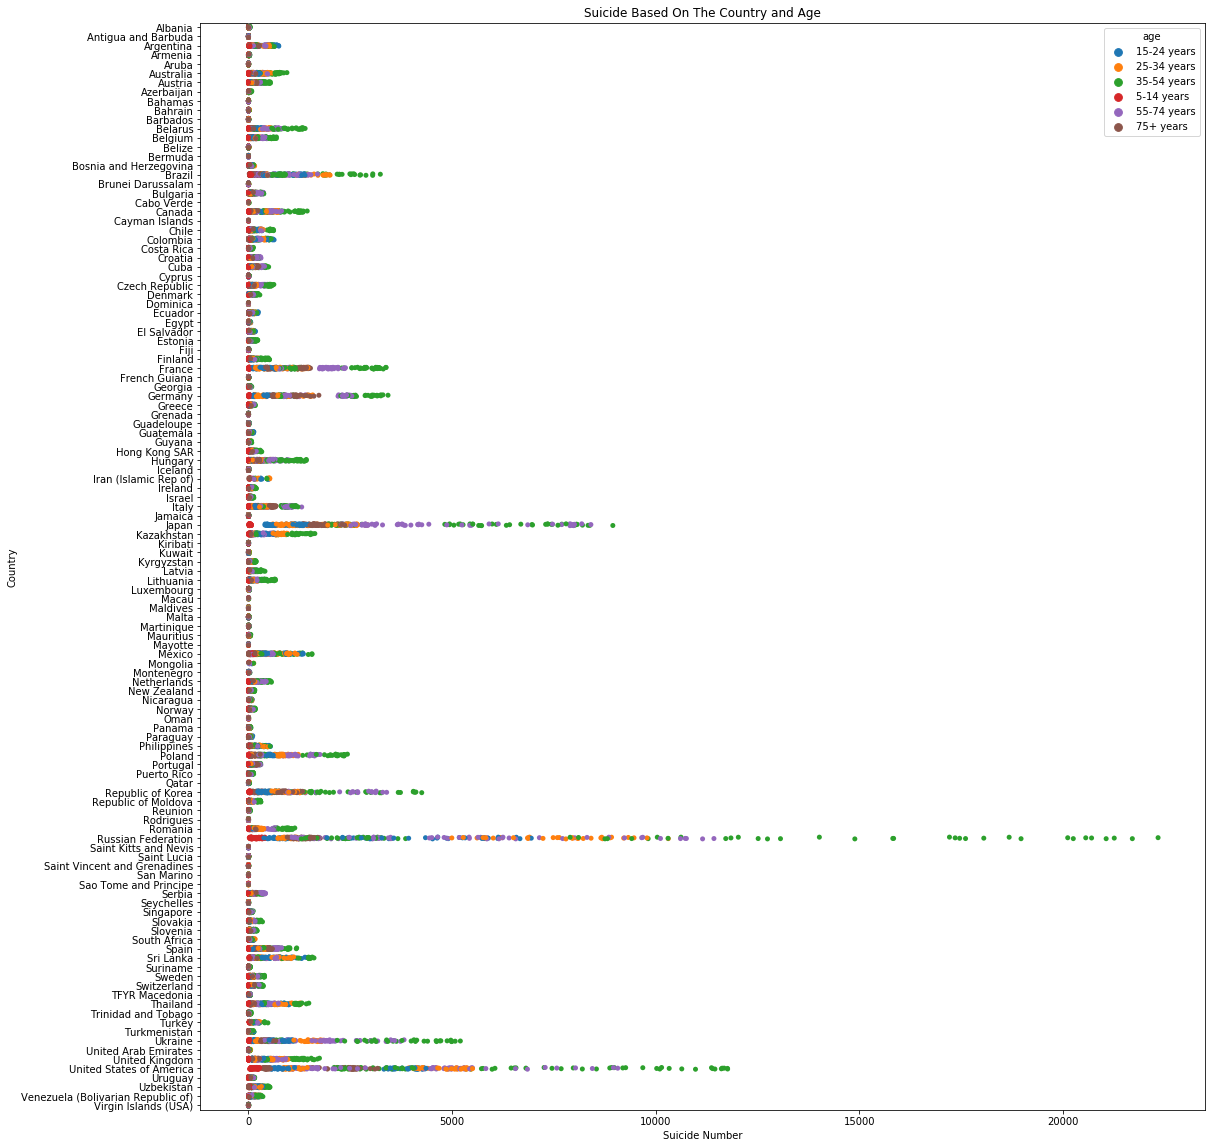

In [97]:
plt.figure(figsize=(18,20))
sns.stripplot(x='suicides_no',y='country',hue='age',data=suicide_data,jitter=True)
plt.ylabel("Country")
plt.xlabel("Suicide Number")
plt.title('Suicide Based On The Country and Age')